<img src="./Img/banner-fa-49-2.jpg">
12 апреля 2021 года, ВМ/305-1(кк)

# Тема 5. Анализ временных рядов

Студенты: Поток У18-7у<br>
Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

## 1. Регрессионные модели и методы
### 1.1. Метод наименьших квадратов

Рассмотрим метод наименьших квадратов (МНК) на примере анализа финансово-экономических данных. Имеются данные об изменении цены акции компании "Роснефть" в течение одного дня 12 февраля 2021 года в csv-формате. Источник: <a href="https://www.finam.ru/">finam.ru</a>. Измерения проводились через равные промежутки времени в течение дня. Представим эти данные в табличном виде. Добавим столбец ${m\_id}$ для номера измерения.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
data = pd.read_csv("./Data/ROSN_210212_210212_hour.csv", sep=';')
data['m_id']=np.arange(1,len(data)+1)
data

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,m_id
0,ROSN,60,12/02/21,110000,496.20,1
1,ROSN,60,12/02/21,120000,489.90,2
2,ROSN,60,12/02/21,130000,494.05,3
3,ROSN,60,12/02/21,140000,496.45,4
4,ROSN,60,12/02/21,150000,498.90,5
5,ROSN,60,12/02/21,160000,498.80,6
6,ROSN,60,12/02/21,170000,502.70,7
7,ROSN,60,12/02/21,180000,502.35,8
8,ROSN,60,12/02/21,190000,504.15,9
9,ROSN,60,12/02/21,200000,505.25,10


Построим график

<AxesSubplot:xlabel='m_id'>

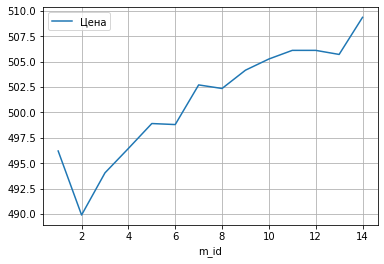

In [18]:
data.plot(x='m_id', y='<CLOSE>', label='Цена', grid=True)

Обозначим цену акции $y$, а момент времени, в который цена измерена $x$. Построим линейную модель имеющихся данных. Линейная модель зависимости $\widehat{y}$ от одной независимой переменной $x$ выражается уравнением $\widehat{y}=w_0+wx$, где $w_0, w$ - коэффициенты или параметры модели. С помощью МНК находят такие значения параметров модели, при которых сумма квадратов расстояний значений измеренной величины от значений модели минимально. Для этого минимизируют функцию

$$
E(w_0, w)=\sum_{i=0}^I(y_i-w_0-wx_i)^2
$$

посредством решения системы уравнений

$$
\begin {cases} 
{\frac{dE(w_0, w)}{dw_0}=0} \\ \\
{\frac{dE(w_0, w)}{dw}=0}
\end {cases}
$$


В процессе решения системы уравнений параметры модели могут быть выражены через значения дисперсии и ковариации признаков, что оказывается удобным для их расчета:

$$
w=\frac{Cov_{xy}}{Disp_x} \\
w_0=M(y)- w \cdot M(x)
$$

где $M(\cdot)$ - математическое ожидание.

Приведенная система уравнений может быть решена и в матричном виде. Для этого предположим, что имеется фиктивная переменная $x_0=1$. Тогда уравнение модели принимает вид $\widehat{y}=w_0x_0+wx = {w}^T {x}$, где $w$ - вектор параметров модели, $x$ - вектор независимых переменных.
 В общем случае, когда имеется $I$ независимых переменных, $x_1, x_2, ... x_I$, уравнение модели принимает вид 

$$
\widehat{y} = \sum_{i=0}^I w_i x_{i} = X{w}^T
$$

</Table>
где $X$ - матрица признаков, в которой $n$ строк по числу независимых переменных и $I+1$ столбец, включая единичный столбец фиктивной переменной слева; $w$ - вектор параметров модели.

Параметры $w$ находят методом наименьших квадратов, минимизируя отклонение $\widehat{y}$ от $y$, которое носит случайный характер и обозначается $\epsilon$. В матричном виде

$$ w=({X}^{T} {X})^{-1} {X}^{T}{y} $$

In [20]:
cov_xy = np.cov(data["m_id"], data["<CLOSE>"])[0,1]
cov_xy

21.85384615384619

In [23]:
disp_x=np.std(data["m_id"])**2
disp_x

16.249999999999996

In [25]:
w=cov_xy/disp_x
w

1.3448520710059197

In [30]:
w0=np.mean(data["<CLOSE>"])-w*np.mean(data["m_id"])
w0

491.05646661031284

In [31]:
data["model"]=w0+w*data["m_id"]

In [32]:
data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,m_id,model
0,ROSN,60,12/02/21,110000,496.20,1,492.401319
1,ROSN,60,12/02/21,120000,489.90,2,493.746171
2,ROSN,60,12/02/21,130000,494.05,3,495.091023
3,ROSN,60,12/02/21,140000,496.45,4,496.435875
4,ROSN,60,12/02/21,150000,498.90,5,497.780727


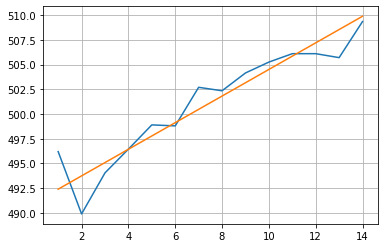

In [36]:
plt.plot(data['m_id'], data['<CLOSE>'])
plt.plot(data['m_id'], data['model'])
plt.grid()

Реализуем решение в матричном виде. Сначала построим матрицу $X$.

In [4]:
x0=np.ones(len(data))
x1=np.array(data['m_id'])
X=np.stack((x0,x1),axis=1)
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]]


Создадим массив значений $y$.

In [37]:
y=np.array(data['<CLOSE>'])
y

array([496.2 , 489.9 , 494.05, 496.45, 498.9 , 498.8 , 502.7 , 502.35,
       504.15, 505.25, 506.1 , 506.1 , 505.7 , 509.35])

Подставим $w$ и $y$ в формулу.

In [6]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(w)

[491.77692308   1.24879121]


Мы получили значения $w_0$ и $w_1$. Построим график $\widehat{y}$.

Text(0, 0.5, 'Цена')

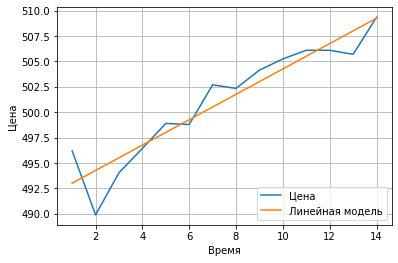

In [7]:
plt.plot(data['m_id'], data['<CLOSE>'], label='Цена')
plt.plot(data['m_id'], w[0]+X[:,1]*w[1], label='Линейная модель')
plt.legend(loc=4)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Цена')